## Image-Based Disease Detection

In [1]:
!pip install tensorflow numpy matplotlib seaborn scikit-learn


## Load Required Libraries


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Libraries loaded successfully")


Libraries loaded successfully


## Check Current Working Directory


In [12]:
import os
print(os.getcwd())


C:\Pneumonia_Detection_Project\notebook


## Define Dataset Paths and Verify Existence


In [13]:
base_dir = "../data/chest_xray"

train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "val")
test_dir  = os.path.join(base_dir, "test")

print(os.path.exists(train_dir))
print(os.path.exists(val_dir))
print(os.path.exists(test_dir))


True
True
True


## Data Preprocessing and Image Augmentation


In [14]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)


## Load Training, Validation, and Test Datasets


In [15]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

val_data = test_gen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Build and Compile CNN Model


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(224,224,3)),   # ✅ Proper input layer

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

## Train the CNN Model


In [18]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data
)


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 606s 4s/step - accuracy: 0.8125 - loss: 0.4095 - val_accuracy: 0.6250 - val_loss: 0.9900
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 426s 3s/step - accuracy: 0.8825 - loss: 0.2721 - val_accuracy: 0.6875 - val_loss: 0.7816
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 417s 3s/step - accuracy: 0.9053 - loss: 0.2387 - val_accuracy: 0.8125 - val_loss: 0.6171
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.9084 - loss: 0.2281 - val_accuracy: 0.6875 - val_loss: 0.6607
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.9143 - loss: 0.2123 - val_accuracy: 0.8750 - val_loss: 0.4738


## Evaluate Model on Test Dataset


In [19]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Accuracy:", test_accuracy)


20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9054 - loss: 0.2832
Test Accuracy: 0.9054487347602844


## Classification Report on Test Dataset


In [20]:
y_pred = (model.predict(test_data) > 0.5).astype("int32")
y_true = test_data.classes

print(classification_report(y_true, y_pred))


20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 608ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       234
           1       0.91      0.94      0.93       390

    accuracy                           0.91       624
   macro avg       0.90      0.89      0.90       624
weighted avg       0.91      0.91      0.90       624



## Confusion Matrix Visualization


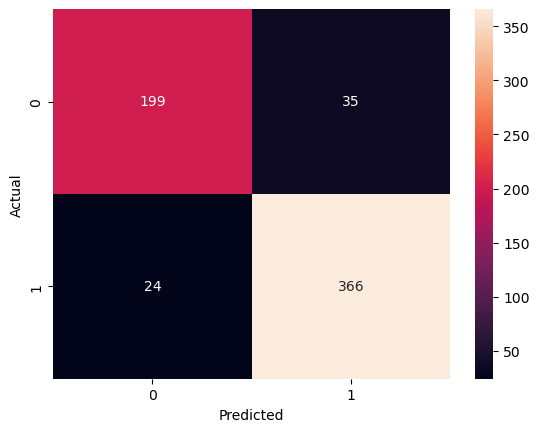

In [21]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ROC-AUC Score for Test Dataset


In [22]:
auc = roc_auc_score(y_true, y_pred)
print("AUC Score:", auc)


AUC Score: 0.8944444444444444


## Training and Validation Accuracy


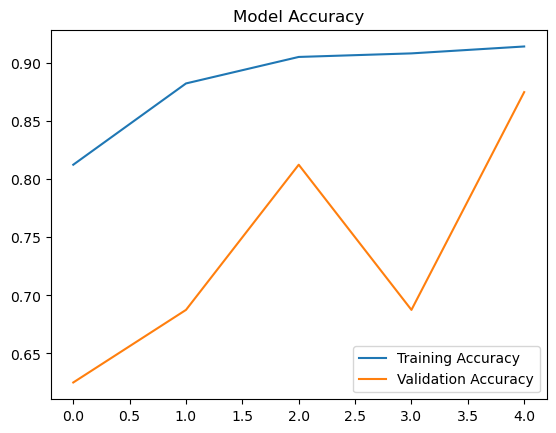

In [30]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()


## Predict Pneumonia on Single X-ray Image


In [23]:
from tensorflow.keras.preprocessing import image

def predict_xray(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img = image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)[0][0]
    
    if pred > 0.5:
        print("🟥 PNEUMONIA DETECTED")
    else:
        print("🟩 NORMAL")

predict_xray("../data/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
🟥 PNEUMONIA DETECTED


## Predict Pneumonia on Single X-ray Image

In [24]:
from tensorflow.keras.preprocessing import image

def predict_xray(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img = image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)[0][0]
    
    if pred > 0.5:
        print("🟥 PNEUMONIA DETECTED")
    else:
        print("🟩 NORMAL")



predict_xray("../data/chest_xray/test/NORMAL/IM-0001-0001.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
🟩 NORMAL


## Predict Pneumonia on Multiple X-ray Images (Batch Prediction)


In [26]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_multiple_images(folder_path):
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Load and preprocess image
        img = image.load_img(img_path, target_size=(224,224))
        img = image.img_to_array(img) / 255.0
        img = np.expand_dims(img, axis=0)

        # Prediction
        pred = model.predict(img)[0][0]

        # Output
        if pred > 0.5:
            result = "🟥 PNEUMONIA"
        else:
            result = "🟩 NORMAL"

        print(f"{img_name} → {result}")


In [27]:
predict_multiple_images("../data/chest_xray/test/NORMAL")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
IM-0001-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
IM-0003-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
IM-0005-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
IM-0006-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
IM-0007-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
IM-0009-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
IM-0010-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
IM-0011-0001-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
IM-0011-0001-0002.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
IM-0011-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
IM-0013-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
IM-0015-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
IM-0016-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
IM-0017-0001.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
IM-001

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
person100_bacteria_475.jpeg → 🟩 NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
person100_bacteria_477.jpeg → 🟥 PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
person100_bacteria_478.jpeg → 🟥 PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
person100_bacteria_479.jpeg → 🟥 PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
person100_bacteria_480.jpeg → 🟥 PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
person100_bacteria_481.jpeg → 🟥 PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
person100_bacteria_482.jpeg → 🟥 PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
person101_bacteria_483.jpeg → 🟥 PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
person101_bacteria_484.jpeg → 🟥 PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
person101_bacteria_485.jpeg → 🟥 PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
person101_bacteria_486.jpeg → 🟥 PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
person102_bacteria_487.jpeg → 🟥 PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/st

## Conclusion and Learnings

- Successfully built a CNN to classify NORMAL vs PNEUMONIA X-ray images.
- Achieved high test accuracy , good precision and recall.
- ROC-AUC score confirms reliable classification.
- Confusion matrix and interactive prediction demonstrate real-world applicability.

